Import required libraries and set up

In [5]:
#Imports and Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


Locate data, read into notebook as a dataframe; Observe initial load of the data

In [6]:
file_path = "../data/raw/CMS_Beneficiary_Combined.csv"

df = pd.read_csv(file_path)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349064 entries, 0 to 349063
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DESYNPUF_ID               349064 non-null  object 
 1   BENE_BIRTH_DT             349064 non-null  int64  
 2   BENE_DEATH_DT             5274 non-null    float64
 3   BENE_SEX_IDENT_CD         349064 non-null  int64  
 4   BENE_RACE_CD              349064 non-null  int64  
 5   BENE_ESRD_IND             349064 non-null  object 
 6   SP_STATE_CODE             349064 non-null  int64  
 7   BENE_COUNTY_CD            349064 non-null  int64  
 8   BENE_HI_CVRAGE_TOT_MONS   349064 non-null  int64  
 9   BENE_SMI_CVRAGE_TOT_MONS  349064 non-null  int64  
 10  BENE_HMO_CVRAGE_TOT_MONS  349064 non-null  int64  
 11  PLAN_CVRG_MOS_NUM         349064 non-null  int64  
 12  SP_ALZHDMTA               349064 non-null  int64  
 13  SP_CHF                    349064 non-null  i

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,00000B48BCF4AD29,19230901,NaN,2,5,0,10,260,12,12,...,1,81000.0,3072.0,0.0,1520.0,80.0,0.0,6260.0,1520.0,0.0
1,0000525AB30E4DEF,19201001,NaN,2,1,0,31,300,12,12,...,1,13260.0,2048.0,0.0,1760.0,670.0,0.0,3830.0,1010.0,50.0
2,00009C897C3D8372,19320101,NaN,1,1,Y,7,70,12,12,...,2,37500.0,4096.0,0.0,100.0,160.0,0.0,1540.0,280.0,60.0
3,0001168CE43BE51B,19340901,NaN,2,1,0,6,200,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0002E494BC87CE10,19140701,NaN,1,2,0,5,200,2,2,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Data overview: understand the strucutre, data types and completeness 

In [11]:
df.shape

(349064, 32)

In [12]:
df.dtypes.value_counts()

int64      20
float64    10
object      2
Name: count, dtype: int64

In [13]:
#Basic info
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DESYNPUF_ID,349064,349064,00000B48BCF4AD29,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BENE_BIRTH_DT,349064.0,NaN,NaN,NaN,19363761.036268,124945.593334,19090101.0,19281101.0,19360601.0,19420301.0,19831201.0
BENE_DEATH_DT,5274.0,NaN,NaN,NaN,20080649.217672,344.892633,20080101.0,20080401.0,20080601.0,20080976.0,20081201.0
BENE_SEX_IDENT_CD,349064.0,NaN,NaN,NaN,1.556726,0.496772,1.0,1.0,2.0,2.0,2.0
BENE_RACE_CD,349064.0,NaN,NaN,NaN,1.283381,0.754206,1.0,1.0,1.0,1.0,5.0
BENE_ESRD_IND,349064,2,0,324309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SP_STATE_CODE,349064.0,NaN,NaN,NaN,25.756618,15.561922,1.0,11.0,25.0,39.0,54.0
BENE_COUNTY_CD,349064.0,NaN,NaN,NaN,365.277812,266.150566,0.0,140.0,330.0,550.0,999.0
BENE_HI_CVRAGE_TOT_MONS,349064.0,NaN,NaN,NaN,11.142063,2.848267,0.0,12.0,12.0,12.0,12.0
BENE_SMI_CVRAGE_TOT_MONS,349064.0,NaN,NaN,NaN,10.491586,3.766494,0.0,12.0,12.0,12.0,12.0


BENE_DEATH_DT    0.984891
DESYNPUF_ID      0.000000
SP_DEPRESSN      0.000000
BENRES_CAR       0.000000
MEDREIMB_CAR     0.000000
PPPYMT_OP        0.000000
BENRES_OP        0.000000
MEDREIMB_OP      0.000000
PPPYMT_IP        0.000000
BENRES_IP        0.000000
MEDREIMB_IP      0.000000
SP_STRKETIA      0.000000
SP_RA_OA         0.000000
SP_OSTEOPRS      0.000000
SP_ISCHMCHT      0.000000
SP_DIABETES      0.000000
SP_COPD          0.000000
BENE_BIRTH_DT    0.000000
SP_CNCR          0.000000
SP_CHRNKIDN      0.000000
dtype: float64

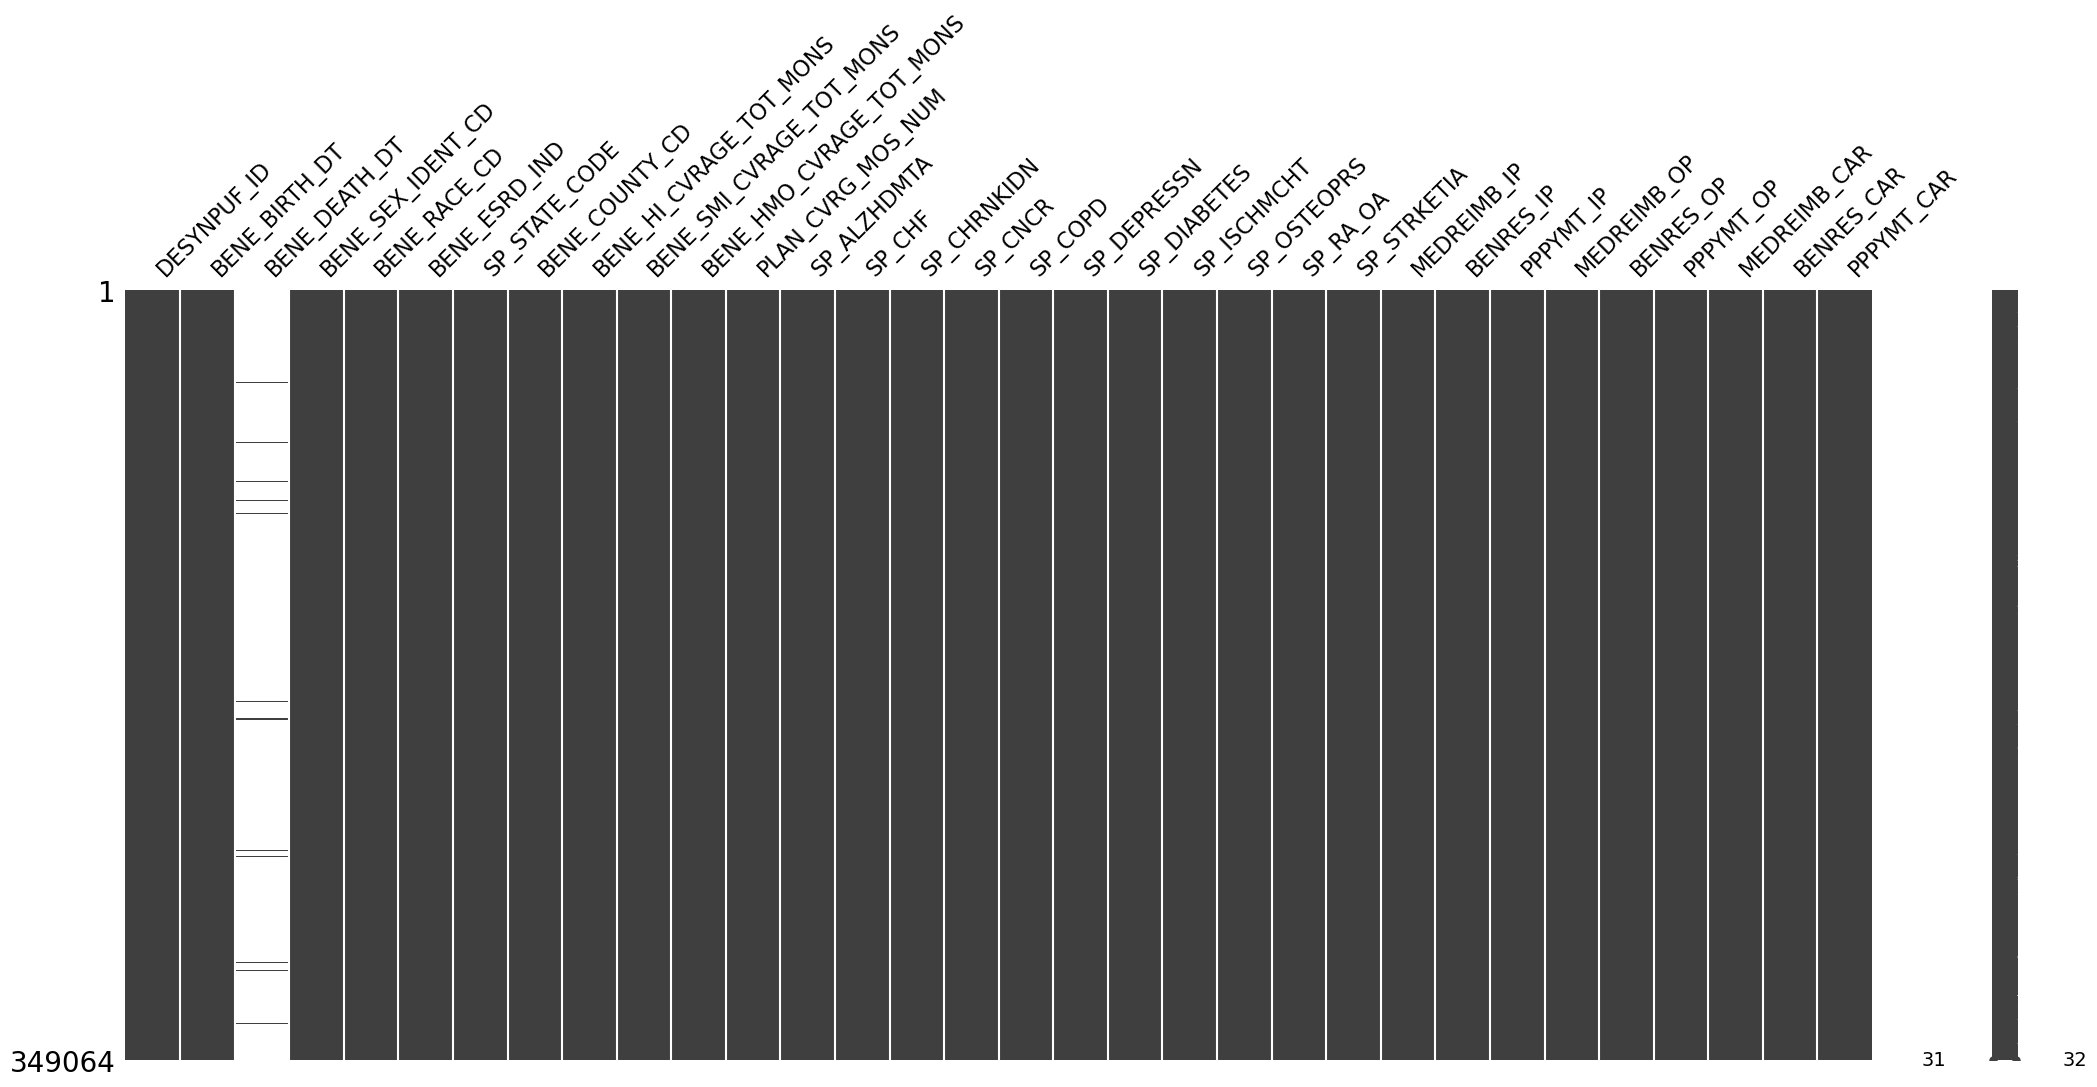

In [14]:
#Missing Data
msno.matrix(df)
df.isnull().mean().sort_values(ascending=False).head(20)

#Observations: 

There is only one column that contains a significant amount of missing values; column is date of death.

In [17]:
data_dict = {
    # === Beneficiary Identification & Demographics ===
    "DESYNPUF_ID": "DESYNPUF: Beneficiary Code",
    "BENE_BIRTH_DT": "DESYNPUF: Date of birth",
    "BENE_DEATH_DT": "DESYNPUF: Date of death",
    "BENE_SEX_IDENT_CD": "DESYNPUF: Sex",
    "BENE_RACE_CD": "DESYNPUF: Beneficiary Race Code",
    "BENE_ESRD_IND": "DESYNPUF: End Stage Renal Disease Indicator",
    "SP_STATE_CODE": "DESYNPUF: State Code",
    "BENE_COUNTY_CD": "DESYNPUF: County Code",

    # === Coverage Months ===
    "BENE_HI_CVRAGE_TOT_MONS": "DESYNPUF: Total number of months of Part A coverage for the beneficiary",
    "BENE_SMI_CVRAGE_TOT_MONS": "DESYNPUF: Total number of months of Part B coverage for the beneficiary",
    "BENE_HMO_CVRAGE_TOT_MONS": "DESYNPUF: Total number of months of HMO coverage for the beneficiary",
    "PLAN_CVRG_MOS_NUM": "DESYNPUF: Total number of months of Part D plan coverage for the beneficiary",

    # === Chronic Conditions (SP_*) ===
    "SP_ALZHDMTA": "DESYNPUF: Chronic Condition – Alzheimer or related disorders or senile dementia",
    "SP_CHF": "DESYNPUF: Chronic Condition – Heart Failure",
    "SP_CHRNKIDN": "DESYNPUF: Chronic Condition – Chronic Kidney Disease",
    "SP_CNCR": "DESYNPUF: Chronic Condition – Cancer",
    "SP_COPD": "DESYNPUF: Chronic Condition – Chronic Obstructive Pulmonary Disease",
    "SP_DEPRESSN": "DESYNPUF: Chronic Condition – Depression",
    "SP_DIABETES": "DESYNPUF: Chronic Condition – Diabetes",
    "SP_ISCHMCHT": "DESYNPUF: Chronic Condition – Ischemic Heart Disease",
    "SP_OSTEOPRS": "DESYNPUF: Chronic Condition – Osteoporosis",
    "SP_RA_OA": "DESYNPUF: Chronic Condition – Rheumatoid Arthritis and Osteoarthritis (RA/OA)",
    "SP_STRKETIA": "DESYNPUF: Chronic Condition – Stroke / Transient Ischemic Attack",

    # === Inpatient Reimbursement & Payment ===
    "MEDREIMB_IP": "DESYNPUF: Inpatient annual Medicare reimbursement amount",
    "BENRES_IP": "DESYNPUF: Inpatient annual beneficiary responsibility amount",
    "PPPYMT_IP": "DESYNPUF: Inpatient annual primary payer reimbursement amount",

    # === Outpatient Institutional Reimbursement & Payment ===
    "MEDREIMB_OP": "DESYNPUF: Outpatient Institutional annual Medicare reimbursement amount",
    "BENRES_OP": "DESYNPUF: Outpatient Institutional annual beneficiary responsibility amount",
    "PPPYMT_OP": "DESYNPUF: Outpatient Institutional annual primary payer reimbursement amount",

    # === Carrier (Physician/Supplier) Reimbursement & Payment ===
    "MEDREIMB_CAR": "DESYNPUF: Carrier annual Medicare reimbursement amount",
    "BENRES_CAR": "DESYNPUF: Carrier annual beneficiary responsibility amount",
    "PPPYMT_CAR": "DESYNPUF: Carrier annual primary payer reimbursement amount",
}

# --- Display Data Dictionary Preview ---
data_dict_df = pd.DataFrame({
    "Variable": list(data_dict.keys()),
    "Label / Definition": list(data_dict.values())
})

# Show first few rows
display(data_dict_df)

,Variable,Label / Definition
0,DESYNPUF_ID,DESYNPUF: Beneficiary Code
1,BENE_BIRTH_DT,DESYNPUF: Date of birth
2,BENE_DEATH_DT,DESYNPUF: Date of death
3,BENE_SEX_IDENT_CD,DESYNPUF: Sex
4,BENE_RACE_CD,DESYNPUF: Beneficiary Race Code
5,BENE_ESRD_IND,DESYNPUF: End Stage Renal Disease Indicator
6,SP_STATE_CODE,DESYNPUF: State Code
7,BENE_COUNTY_CD,DESYNPUF: County Code
8,BENE_HI_CVRAGE_TOT_MONS,DESYNPUF: Total number of months of Part A cov...
9,BENE_SMI_CVRAGE_TOT_MONS,DESYNPUF: Total number of months of Part B cov...


In [22]:
#Check for duplicates
df.duplicated().sum()

np.int64(0)

In [31]:
#Convert Columns to correct data types

df['BENE_BIRTH_DT'] = pd.to_datetime(df['BENE_BIRTH_DT'], errors='coerce')

df['BENE_DEATH_DT'] = pd.to_datetime(df['BENE_DEATH_DT'], errors='coerce')

print(df['BENE_BIRTH_DT'].head(2))

0   1970-01-01 00:00:00.019230901
1   1970-01-01 00:00:00.019201001
Name: BENE_BIRTH_DT, dtype: datetime64[ns]


The average age of beneficiary is 55.0 and the median age is 55.0


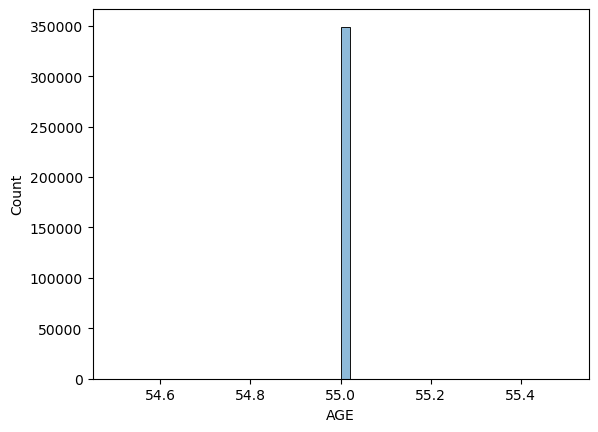

In [29]:
# Age calculation
df['AGE'] = (pd.Timestamp('2024-12-31') - df['BENE_BIRTH_DT']).dt.days // 365

avg_age = df['AGE'].mean()
med_age = df['AGE'].median()
sns.histplot(df['AGE'], bins=50, kde=True)

print(f'The average age of beneficiary is {avg_age} and the median age is {med_age}')


Observation: 

As of December 31, 2024 the average and median ages of claims beneficiaries in this data set is 55. This data only has records of people who are this age. The model and data will only be able to make inferences on people in this age group; & potenitally +/- 5 years. 

People in this age group typically have better insurance converage due to higher levels of economic resources.

We would expect a lower claim default rate and higher levels of reimbursements. 

In [30]:
#Separate Categorical and Numeric Features
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nwe have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We have 31 numerical features : ['BENE_BIRTH_DT', 'BENE_DEATH_DT', 'BENE_SEX_IDENT_CD', 'BENE_RACE_CD', 'SP_STATE_CODE', 'BENE_COUNTY_CD', 'BENE_HI_CVRAGE_TOT_MONS', 'BENE_SMI_CVRAGE_TOT_MONS', 'BENE_HMO_CVRAGE_TOT_MONS', 'PLAN_CVRG_MOS_NUM', 'SP_ALZHDMTA', 'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN', 'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA', 'MEDREIMB_IP', 'BENRES_IP', 'PPPYMT_IP', 'MEDREIMB_OP', 'BENRES_OP', 'PPPYMT_OP', 'MEDREIMB_CAR', 'BENRES_CAR', 'PPPYMT_CAR', 'AGE']

we have 2 categorical features : ['DESYNPUF_ID', 'BENE_ESRD_IND']


In [32]:
#Vlaues of each category column and their counts

for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('--------------------------------')

DESYNPUF_ID
00000B48BCF4AD29    0.000286
FFCA6A53B978E4A6    0.000286
FFCDE66B72F356B3    0.000286
FFCC8FA01F9C40FC    0.000286
FFCC2B9BE9DA33C6    0.000286
                      ...   
FFE5056E724C9F0A    0.000286
FFE300F6CFB9EFB0    0.000286
FFE2A14849740004    0.000286
FFE155A5607F8A7F    0.000286
FFFFE00DD0AA36E0    0.000286
Name: proportion, Length: 349064, dtype: float64
--------------------------------
BENE_ESRD_IND
0    92.908177
Y     7.091823
Name: proportion, dtype: float64
--------------------------------


In [33]:
#Univariate Analysis 
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns


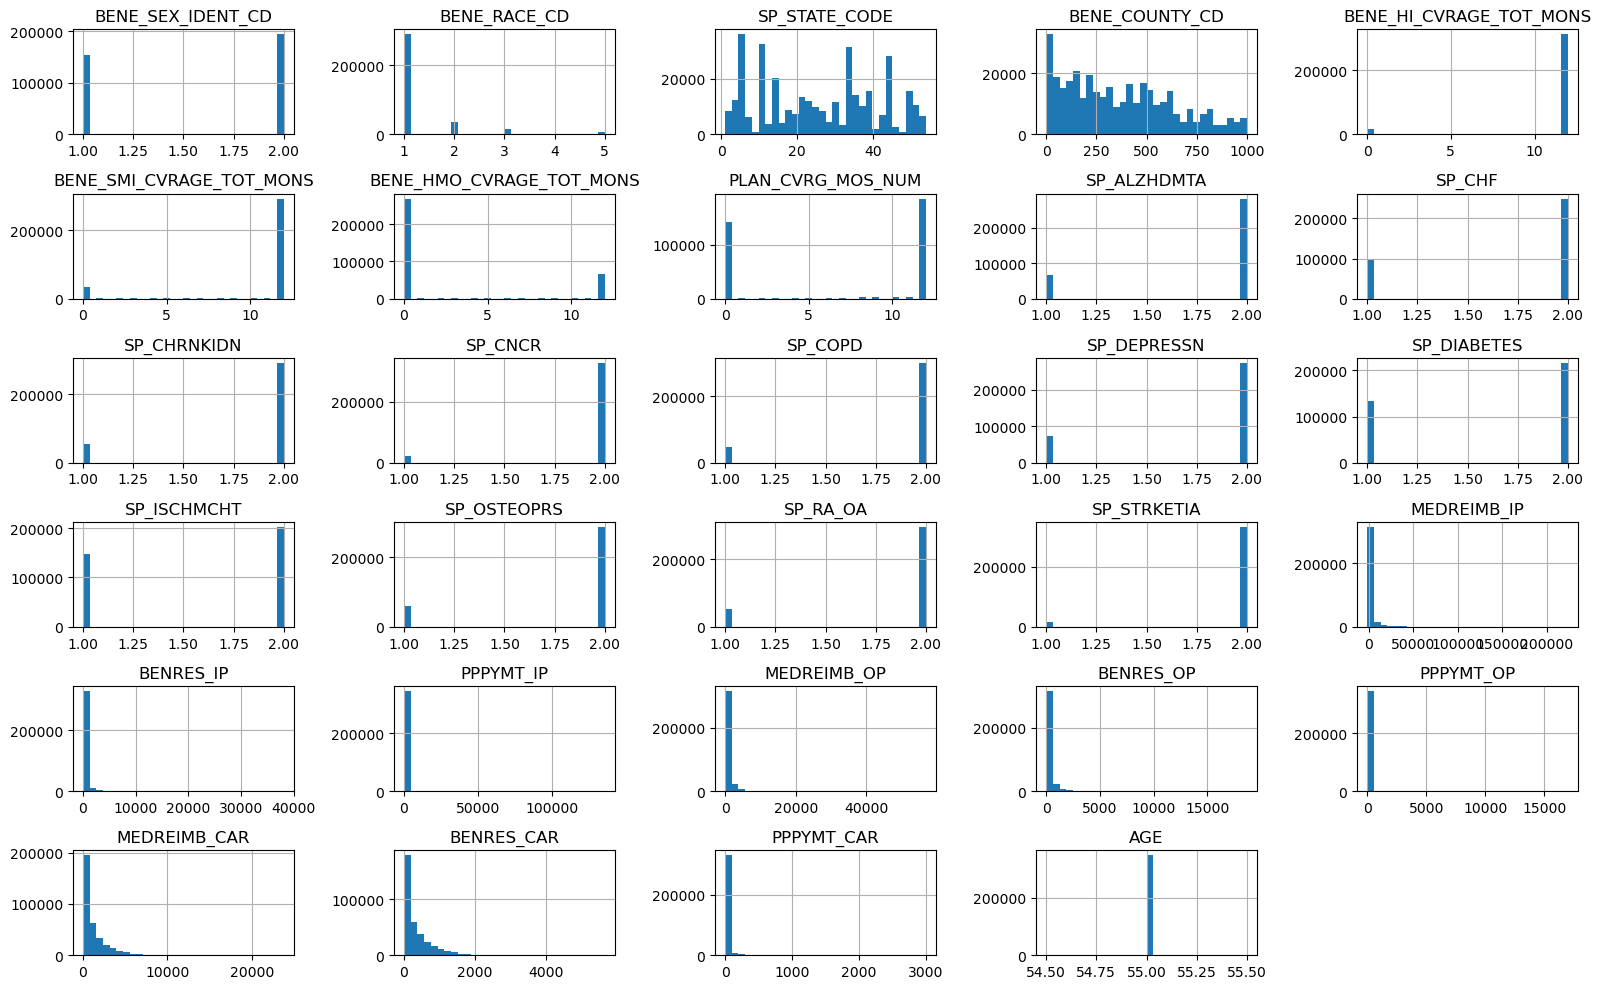

In [34]:
# Numeric
df[num_cols].hist(figsize=(16, 10), bins=30)
plt.tight_layout()

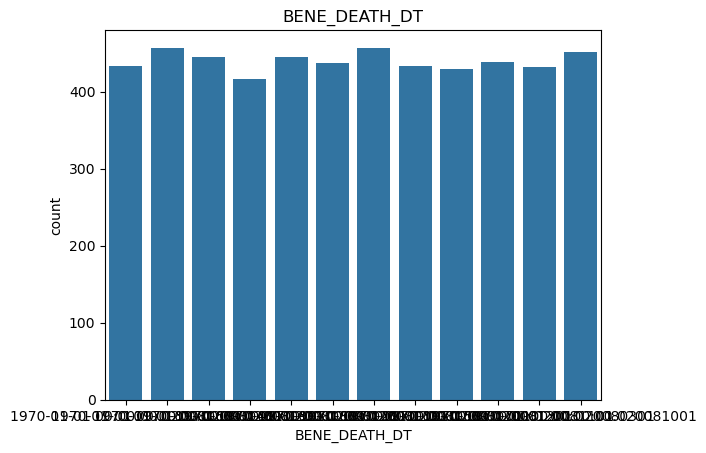

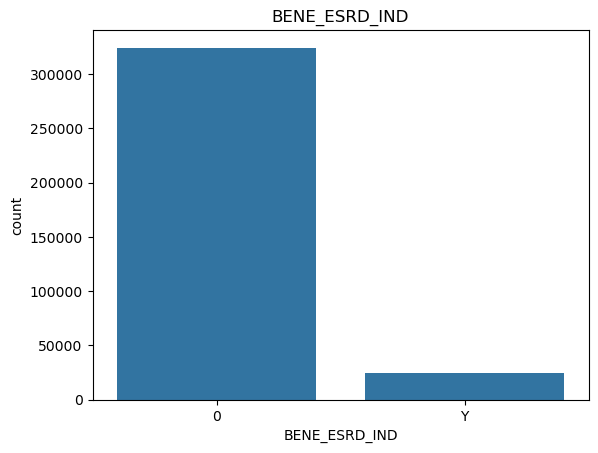

In [35]:
# Categorical
for col in cat_cols:
    if df[col].nunique() < 20:
        sns.countplot(x=col, data=df)
        plt.title(col)
        plt.show()

In [36]:
# Columns that are numeric but represent categorical codes
numeric_but_categorical = [
    'BENE_SEX_IDENT_CD',     # 1 = Male, 2 = Female
    'BENE_RACE_CD',          # 1 = White, 2 = Black, 3 = Other, 5 = Hispanic
    'SP_STATE_CODE',         # State numeric codes
    'BENE_COUNTY_CD',        # County codes
]

binary_columns = ['BENE_ESRD_IND']

# Identify numeric and continuous columns
numeric_cols = [col for col in df.select_dtypes(include=np.number).columns
                if col not in numeric_but_categorical and col != 'AGE']

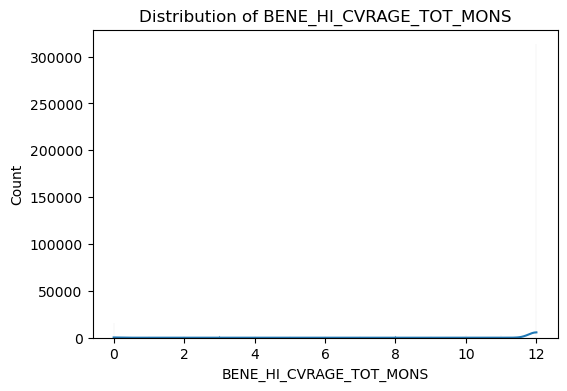

count    349064.000000
mean         11.142063
std           2.848267
min           0.000000
25%          12.000000
50%          12.000000
75%          12.000000
max          12.000000
Name: BENE_HI_CVRAGE_TOT_MONS, dtype: float64 



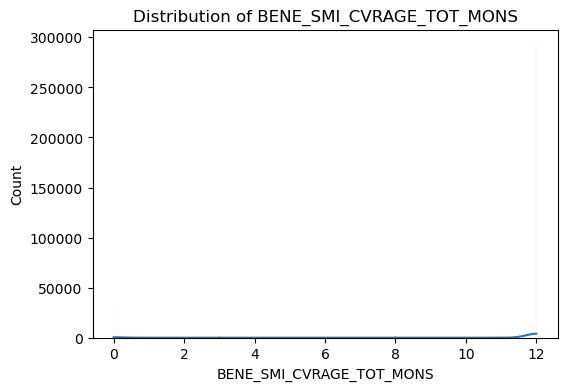

count    349064.000000
mean         10.491586
std           3.766494
min           0.000000
25%          12.000000
50%          12.000000
75%          12.000000
max          12.000000
Name: BENE_SMI_CVRAGE_TOT_MONS, dtype: float64 



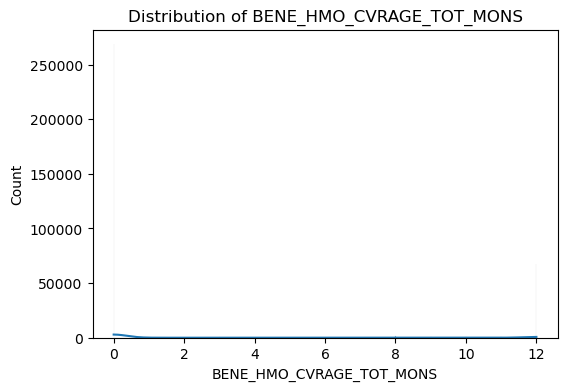

count    349064.000000
mean          2.574685
std           4.828141
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          12.000000
Name: BENE_HMO_CVRAGE_TOT_MONS, dtype: float64 



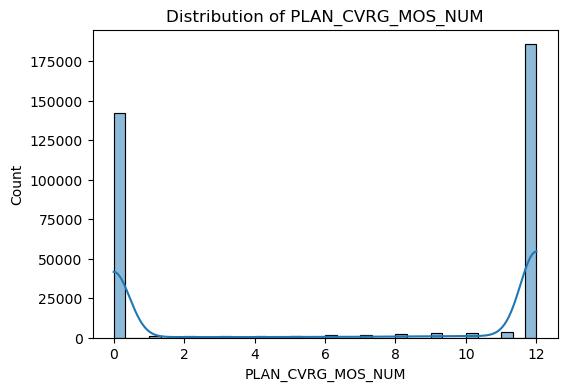

count    349064.000000
mean          6.823540
std           5.815862
min           0.000000
25%           0.000000
50%          12.000000
75%          12.000000
max          12.000000
Name: PLAN_CVRG_MOS_NUM, dtype: float64 



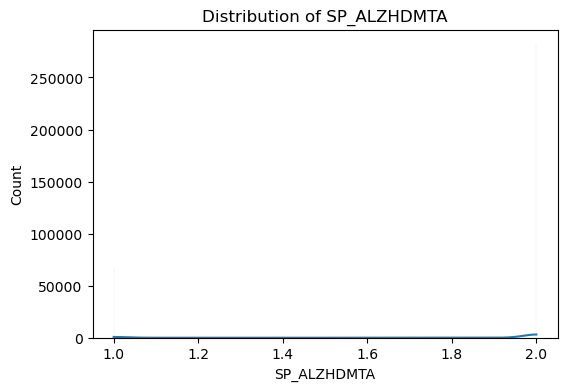

count    349064.000000
mean          1.807213
std           0.394488
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: SP_ALZHDMTA, dtype: float64 



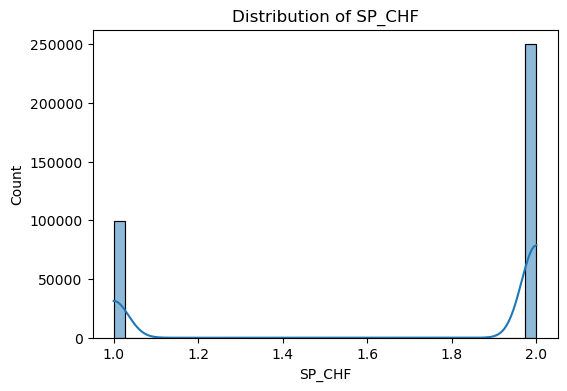

count    349064.000000
mean          1.715402
std           0.451224
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: SP_CHF, dtype: float64 



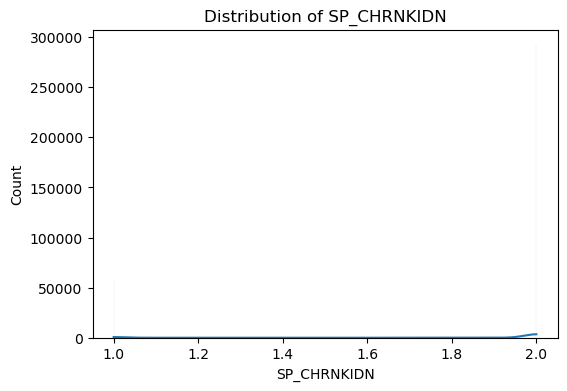

count    349064.000000
mean          1.838829
std           0.367689
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: SP_CHRNKIDN, dtype: float64 



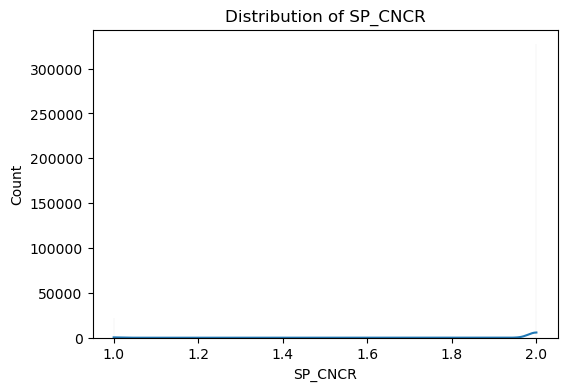

count    349064.000000
mean          1.936662
std           0.243570
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: SP_CNCR, dtype: float64 



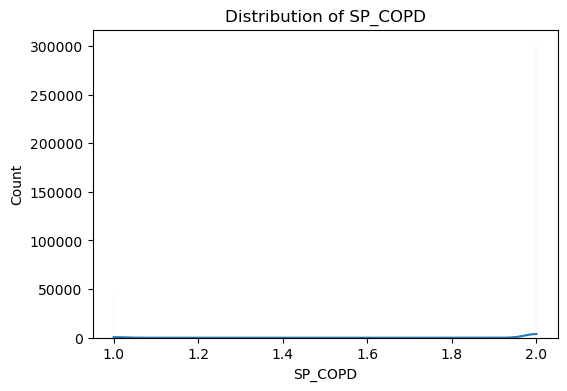

count    349064.000000
mean          1.863819
std           0.342982
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: SP_COPD, dtype: float64 



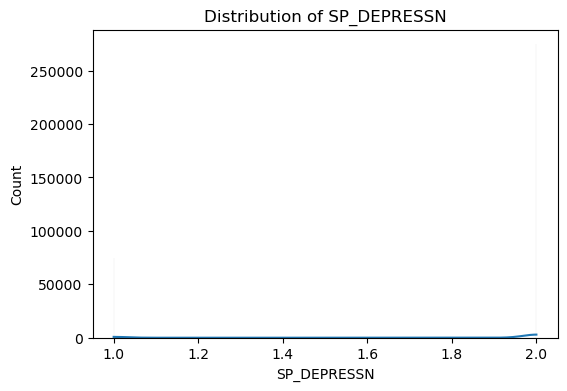

count    349064.000000
mean          1.786712
std           0.409630
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: SP_DEPRESSN, dtype: float64 



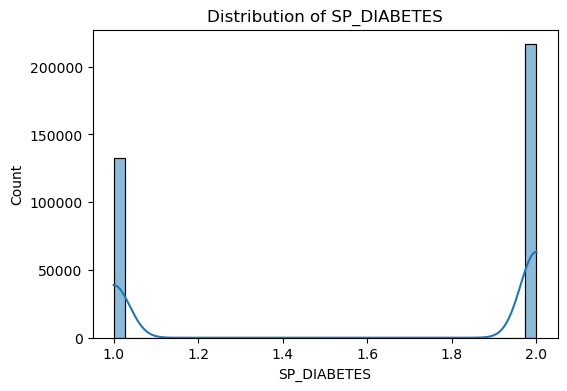

count    349064.000000
mean          1.620121
std           0.485357
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: SP_DIABETES, dtype: float64 



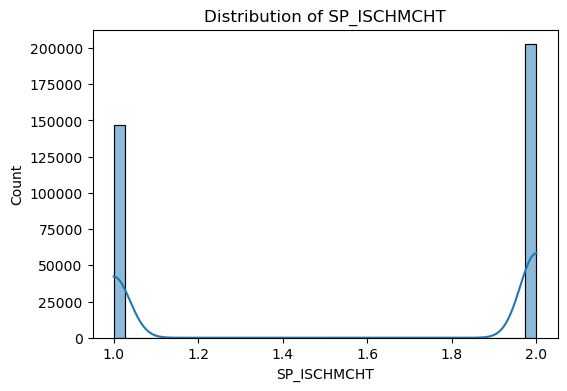

count    349064.000000
mean          1.579994
std           0.493560
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: SP_ISCHMCHT, dtype: float64 



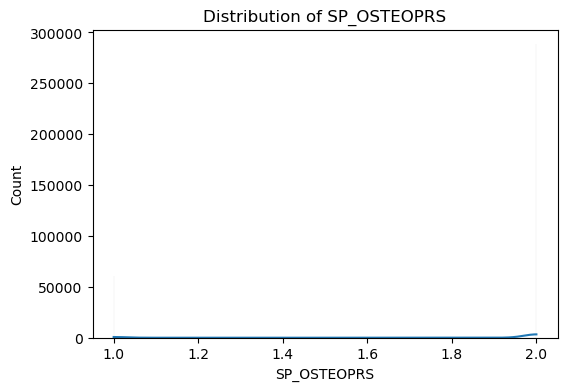

count    349064.000000
mean          1.825783
std           0.379297
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: SP_OSTEOPRS, dtype: float64 



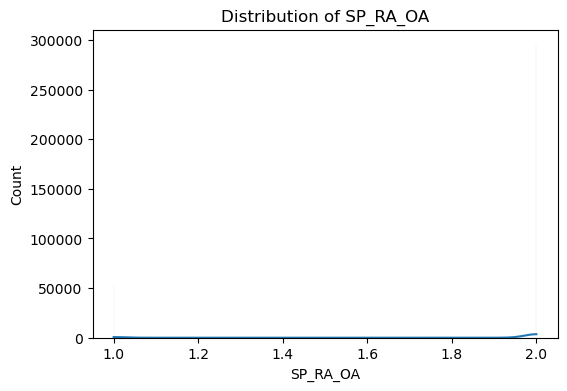

count    349064.000000
mean          1.846469
std           0.360499
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: SP_RA_OA, dtype: float64 



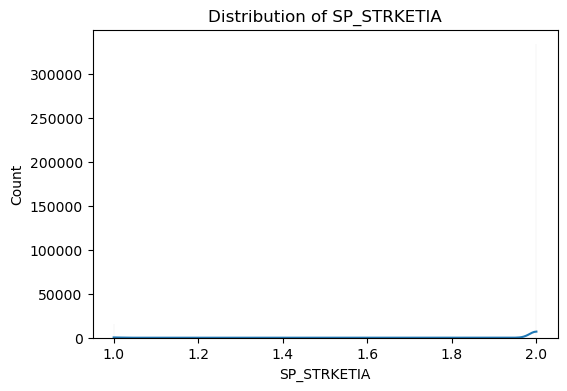

count    349064.000000
mean          1.954690
std           0.207983
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: SP_STRKETIA, dtype: float64 



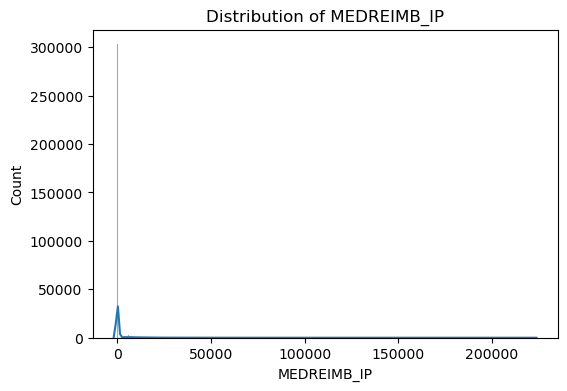

count    349064.000000
mean       2206.660526
std        8456.100446
min       -2000.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      223800.000000
Name: MEDREIMB_IP, dtype: float64 



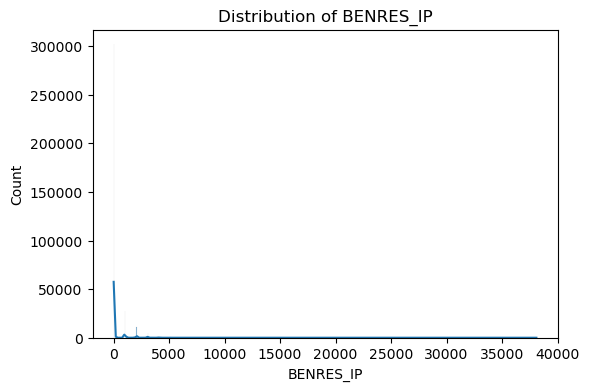

count    349064.000000
mean        247.070388
std         866.651781
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       38096.000000
Name: BENRES_IP, dtype: float64 



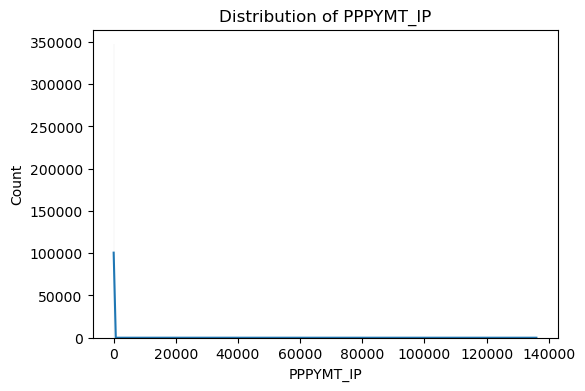

count    349064.000000
mean        108.837634
std        2032.505468
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      136000.000000
Name: PPPYMT_IP, dtype: float64 



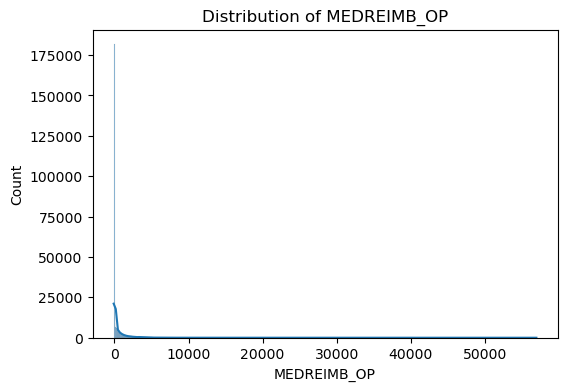

count    349064.000000
mean        625.907169
std        1803.823428
min        -100.000000
25%           0.000000
50%          20.000000
75%         560.000000
max       56930.000000
Name: MEDREIMB_OP, dtype: float64 



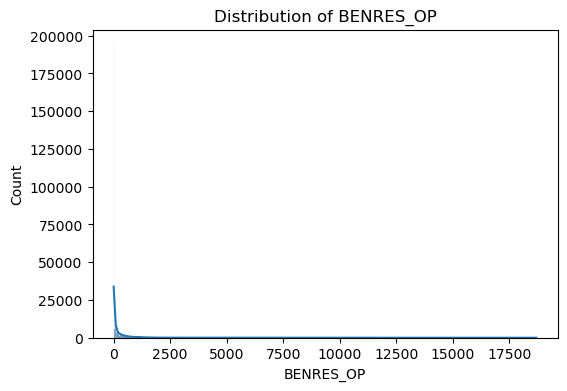

count    349064.000000
mean        197.755626
std         521.678712
min           0.000000
25%           0.000000
50%           0.000000
75%         180.000000
max       18700.000000
Name: BENRES_OP, dtype: float64 



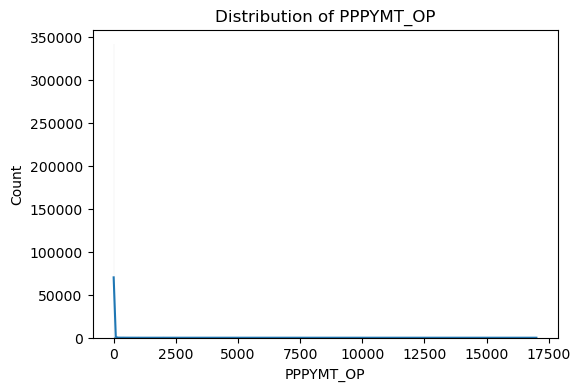

count    349064.000000
mean         24.707303
std         358.464028
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       17000.000000
Name: PPPYMT_OP, dtype: float64 



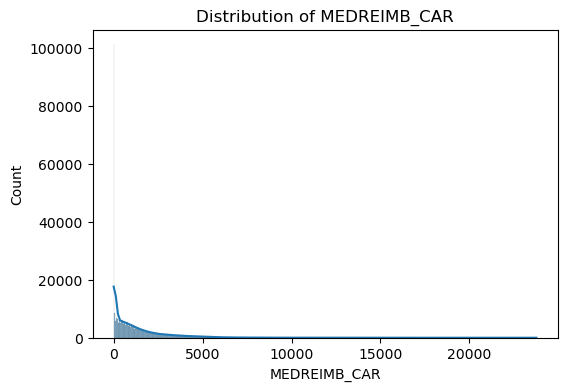

count    349064.000000
mean       1164.023216
std        1593.554623
min           0.000000
25%           0.000000
50%         610.000000
75%        1640.000000
max       23770.000000
Name: MEDREIMB_CAR, dtype: float64 



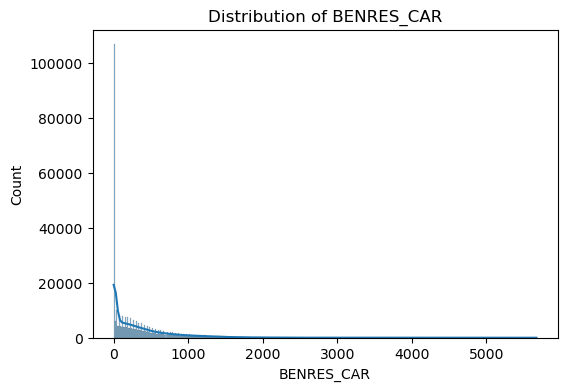

count    349064.000000
mean        329.148294
std         438.263621
min           0.000000
25%           0.000000
50%         170.000000
75%         480.000000
max        5670.000000
Name: BENRES_CAR, dtype: float64 



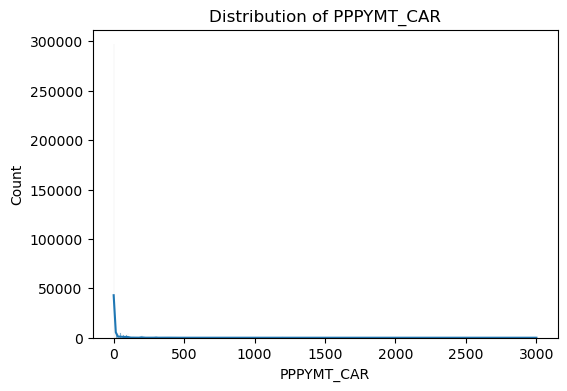

count    349064.000000
mean         18.857860
std          90.407465
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        3000.000000
Name: PPPYMT_CAR, dtype: float64 



In [37]:
## Numeric (Continuous) Variables
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()
    print(df[col].describe(), "\n")

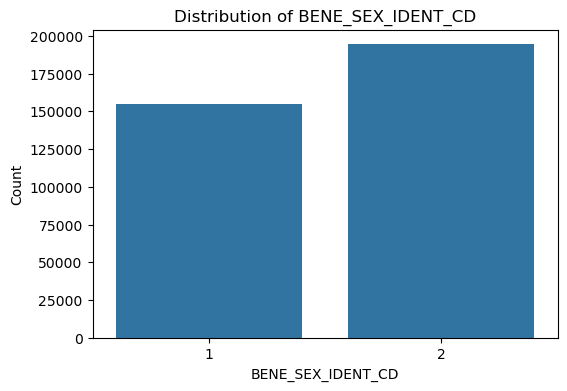

BENE_SEX_IDENT_CD
2    0.557
1    0.443
Name: proportion, dtype: float64 



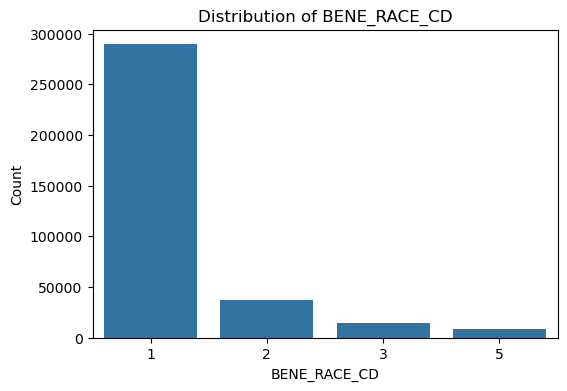

BENE_RACE_CD
1    0.829
2    0.106
3    0.042
5    0.024
Name: proportion, dtype: float64 



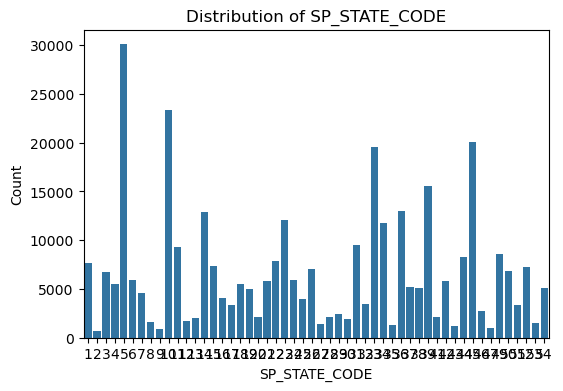

SP_STATE_CODE
5     0.086
10    0.067
45    0.057
33    0.056
39    0.045
36    0.037
14    0.037
23    0.035
34    0.034
31    0.027
11    0.027
49    0.025
44    0.024
22    0.022
1     0.022
15    0.021
52    0.021
26    0.020
50    0.020
3     0.019
6     0.017
24    0.017
21    0.017
42    0.017
18    0.016
4     0.016
37    0.015
38    0.015
54    0.014
19    0.014
7     0.013
16    0.012
25    0.011
32    0.010
51    0.010
17    0.010
46    0.008
29    0.007
28    0.006
41    0.006
20    0.006
13    0.006
30    0.006
12    0.005
8     0.004
53    0.004
27    0.004
35    0.004
43    0.003
47    0.003
9     0.002
2     0.002
Name: proportion, dtype: float64 



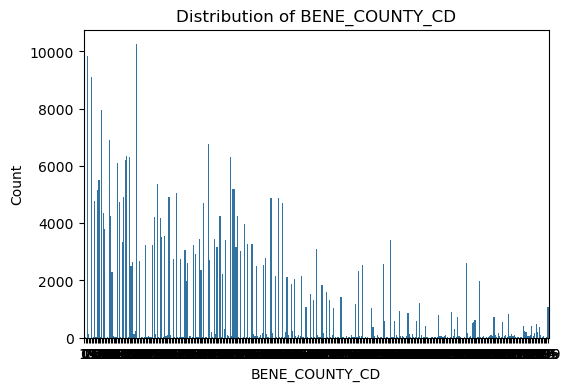

BENE_COUNTY_CD
200    0.029
10     0.028
20     0.026
0      0.025
60     0.023
       ...  
781    0.000
784    0.000
292    0.000
201    0.000
672    0.000
Name: proportion, Length: 319, dtype: float64 



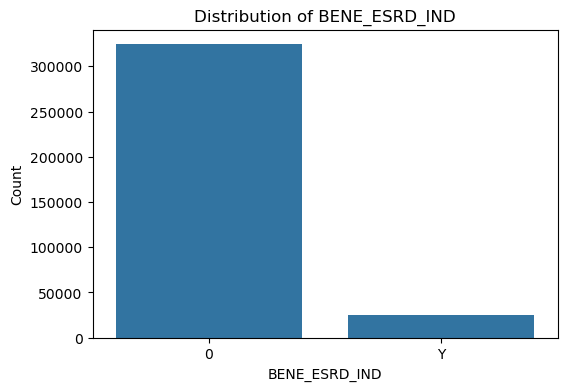

BENE_ESRD_IND
0    0.929
Y    0.071
Name: proportion, dtype: float64 



In [38]:
## Categorical (Nominal or Binary) Variables
for col in numeric_but_categorical + binary_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
    print(df[col].value_counts(dropna=False, normalize=True).round(3), "\n")